## Observations and Insights

In this study we are looking at various drug regimens for cancer treatment.  The following four have shown the most promising in terms of tumor size reduction: Capomulin, Ramicane, Infubinol, and Ceftamin.
1. Ramicane and Capomulin had 1/3 of the deaths compared to the placebo.  These where the only outliers of the drug Regimens.
2. Ramicane and Capomulin where at the lower bound of the number of metastatic sites compared to all drug regimens.  
3. Capomulin was the drug of interest.  Following this study I would recommend more emphasis on Ramicane.
4. 

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')

# Data table preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
mean_age =complete_df.groupby('Drug Regimen').mean()['Age_months']
mean_metasites = complete_df.groupby('Drug Regimen').mean()['Metastatic Sites']
complete_df.groupby('Drug Regimen').mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [ ]:
complete_df[]

### Error Check

In [119]:
#there are 10 time points.  The mouse may die,
#but there shouldn't be any counts greater than 10
a =complete_df['Mouse ID'].value_counts()
a = pd.DataFrame(a)
a=a[a['Mouse ID']<10]
b = complete_df[['Mouse ID', 'Drug Regimen']].drop_duplicates()
b = b.reset_index()
a =a.reset_index()
#c = pd.merge(a,b, on = 'Mouse ID',how = 'left')
c =a.merge(b,left_on='index', right_on = 'Mouse ID')
d =c.groupby('Drug Regimen').count()
d.sort_values('index_x')['index_x']

Drug Regimen
Capomulin     4
Ramicane      5
Zoniferol    11
Ceftamin     12
Naftisol     12
Stelasyn     13
Ketapril     14
Placebo      14
Infubinol    16
Propriva     17
Name: index_x, dtype: int64

In [79]:
#g989 has multiple duplicate entries/errors
#At time point 5 there are conflicting Tumor Volumes
complete_df[complete_df['Mouse ID']=='g989'].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
clean_data = complete_df.copy()
clean_data =clean_data.set_index('Mouse ID')
clean_data = clean_data.drop(index = 'g989')
clean_data = clean_data.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_data[['Drug Regimen']].drop_duplicates()
drug_regimen = drug_regimen.sort_values(by = "Drug Regimen")
drug_regimen = drug_regimen.set_index("Drug Regimen")

drug_regimen['Mean']=clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].values
drug_regimen['Median']= clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].values
drug_regimen['Variance'] = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].values
drug_regimen['Standard Deviation'] = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].values
drug_regimen['Standard Error of Measure'] = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].values
drug_regimen.T

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Standard Deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Standard Error of Measure,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


## Bar plots

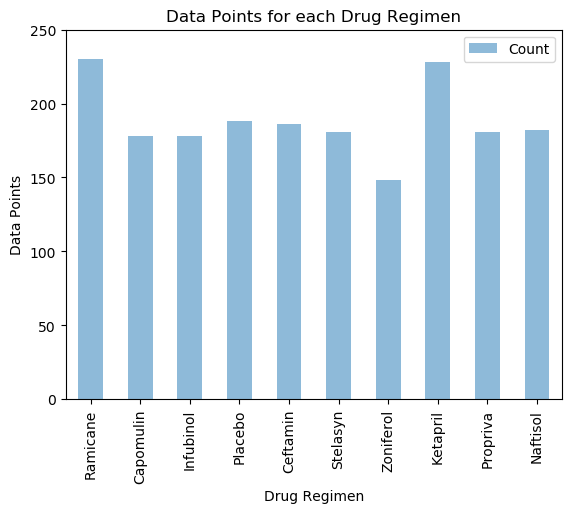

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_datapoints = clean_data[['Drug Regimen']].drop_duplicates()
regimen_datapoints['Count'] = clean_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].values
regimen_datapoints
regimen_datapoints.plot.bar('Drug Regimen','Count',alpha = 0.5)

plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.title(f"Data Points for each Drug Regimen")
plt.ylim(0,250)


plt.show()

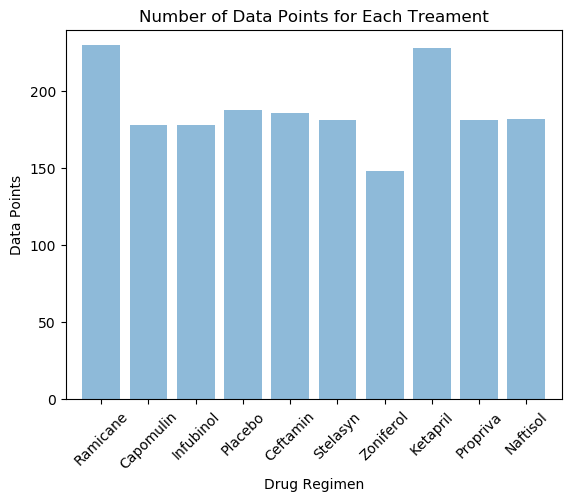

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(regimen_datapoints['Count']))
plt.bar(x_axis, regimen_datapoints['Count'], alpha=0.5)
plt.xticks(x_axis,regimen_datapoints['Drug Regimen'])
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen_datapoints['Count'])+10)

plt.title("Number of Data Points for Each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")




plt.show()

## Pie plots

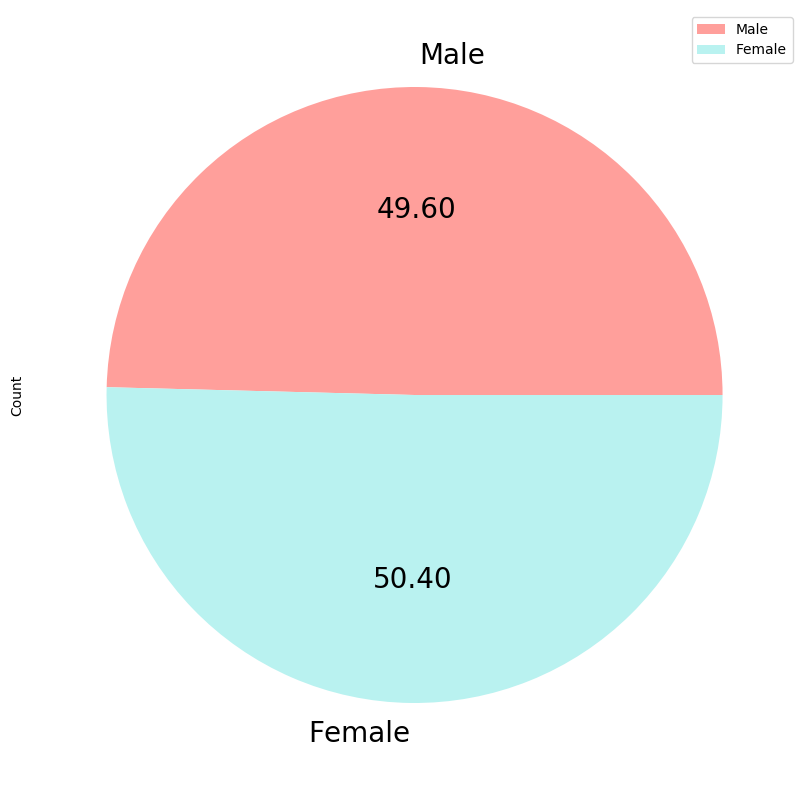

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_data[['Sex']].drop_duplicates()
temp_sex = clean_data[['Mouse ID','Sex']].drop_duplicates()
mouse_sex['Count'] = temp_sex.groupby('Sex').count().values
mouse_sex = mouse_sex.set_index('Sex')
mouse_sex.plot.pie(y ='Count', figsize = (10,10),fontsize = 20, colors =['r','c'],autopct = '%.2f')
plt.title= 'Distribution of Female vs Male Mice'
plt.show()

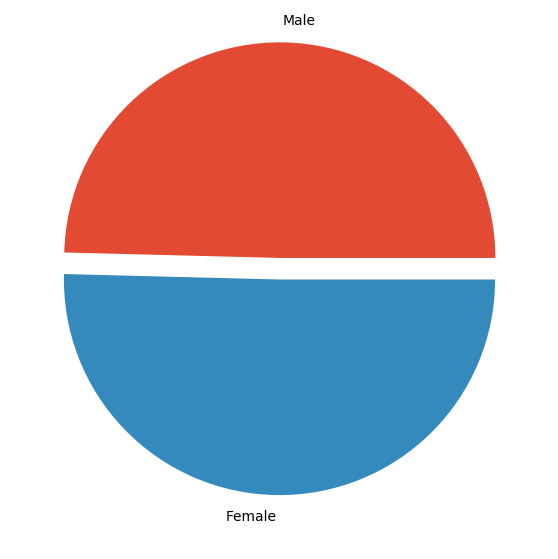

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (7,7), dpi = 100)
explode = (0.1, 0)

#plt.title('Distribution of Female vs Male Mice')
plt.pie(mouse_sex.Count.values,labels = mouse_sex.index.values,  explode = explode)
plt.show()


## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
initial_timepoint = clean_data[clean_data['Timepoint']==0]
final_timepoint = clean_data[clean_data['Timepoint']==45]
initial_tumor_volume = initial_timepoint.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']]
final_tumor_volume = final_timepoint.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']]
top_four = ((final_tumor_volume-initial_tumor_volume)/initial_tumor_volume).sort_values('Tumor Volume (mm3)')
placebo = top_four[top_four.index=='Placebo']
top_four =top_four.head(4)
top_four =top_four.append(placebo)

final_timepoint = final_timepoint.set_index('Drug Regimen')
final_timepoint_reduced = final_timepoint[["Tumor Volume (mm3)"]]

output = pd.merge(top_four,final_timepoint_reduced,on = "Drug Regimen",how = 'left')
output = output[['Tumor Volume (mm3)_y']]
output.columns = ['Final Tumor Volume']
tumor_sizes = output['Final Tumor Volume'].values

quartiles = output['Final Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)




capomulin=output[output.index=='Capomulin']
ramicane=output[output.index=='Ramicane']
infubinol=output[output.index=='Infubinol']
ceftamin=output[output.index=='Ceftamin']
placebo=output[output.index=='Placebo']



capomulin_quartiles = capomulin['Final Tumor Volume'].quantile([.25,.5,.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = upperq-lowerq
capomulin_lower_bound = lowerq - (1.5*iqr)
capomulin_upper_bound = upperq + (1.5*iqr)

ramicane_quartiles = ramicane['Final Tumor Volume'].quantile([.25,.5,.75])
ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = upperq-lowerq
ramicane_lower_bound = lowerq - (1.5*iqr)
ramicane_upper_bound = upperq + (1.5*iqr)

infubinol_quartiles = infubinol['Final Tumor Volume'].quantile([.25,.5,.75])
infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = upperq-lowerq
infubinol_lower_bound = lowerq - (1.5*iqr)
infubinol_upper_bound = upperq + (1.5*iqr)

ceftamin_quartiles = ceftamin['Final Tumor Volume'].quantile([.25,.5,.75])
ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = upperq-lowerq
ceftamin_lower_bound = lowerq - (1.5*iqr)
ceftamin_upper_bound = upperq + (1.5*iqr)

placebo_quartiles = placebo['Final Tumor Volume'].quantile([.25,.5,.75])
placebo_lowerq = quartiles[0.25]
placebo_upperq = quartiles[0.75]
placebo_iqr = upperq-lowerq
placebo_lower_bound = lowerq - (1.5*iqr)
placebo_upper_bound = upperq + (1.5*iqr)


In [11]:
# top four alongside placebo
top_four

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,-0.223209
Capomulin,-0.194753
Ceftamin,0.425165
Infubinol,0.461235
Placebo,0.512980


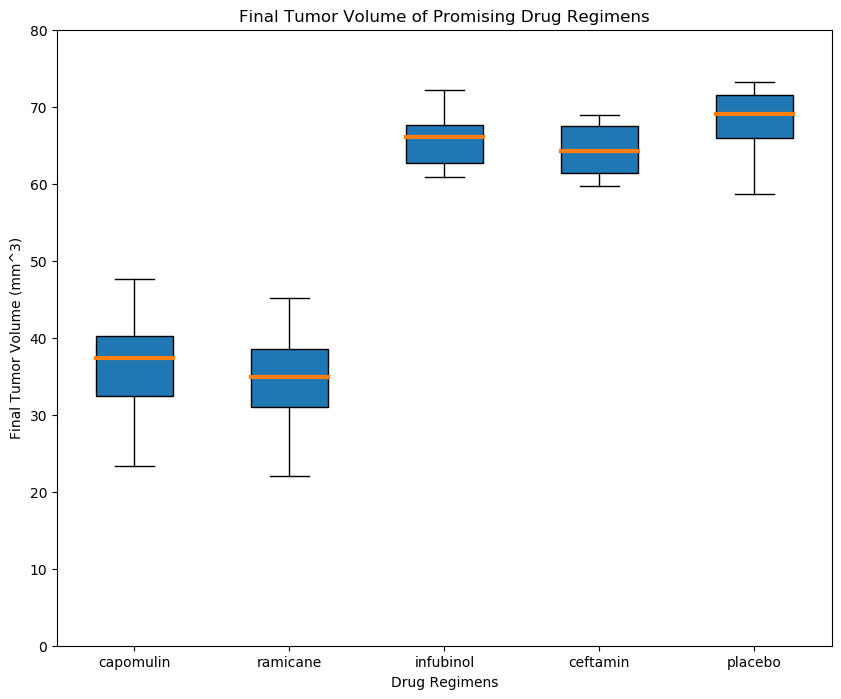

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




#print(sum(capomulin["Final Tumor Volume"]>capomulin_upper_bound) + sum(capomulin["Final Tumor Volume"]<capomulin_lower_bound))
#print(sum(ramicane["Final Tumor Volume"]>ramicane_upper_bound) + sum(ramicane["Final Tumor Volume"]<ramicane_lower_bound))
#print(sum(infubinol["Final Tumor Volume"]>infubinol_upper_bound) + sum(infubinol["Final Tumor Volume"]<infubinol_lower_bound))
#print(sum(ceftamin["Final Tumor Volume"]>ceftamin_upper_bound) + sum(ceftamin["Final Tumor Volume"]<ceftamin_lower_bound))
#print(sum(placebo["Final Tumor Volume"]>placebo_upper_bound) + sum(placebo["Final Tumor Volume"]<placebo_lower_bound))


plt.figure(figsize = (10,8), dpi = 100)
plt.style.use('default')
plt.boxplot([capomulin['Final Tumor Volume'],ramicane['Final Tumor Volume'],
             infubinol['Final Tumor Volume'],ceftamin['Final Tumor Volume'],
             placebo['Final Tumor Volume']], labels = ["capomulin","ramicane","infubinol","ceftamin","placebo"],
           patch_artist = True, medianprops = {'linewidth':3})

plt.title("Final Tumor Volume of Promising Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm^3)")
plt.ylim(0,80)

plt.show()

In [14]:
sum(capomulin["Final Tumor Volume"]<capomulin_lower_bound)

0

In [15]:
capomulin=output[output.index=='Capomulin']
ramicane=output[output.index=='Ramicane']
infubinol=output[output.index=='Infubinol']
ceftamin=output[output.index=='Ceftamin']
placebo=output[output.index=='Placebo']

## Line and scatter plots

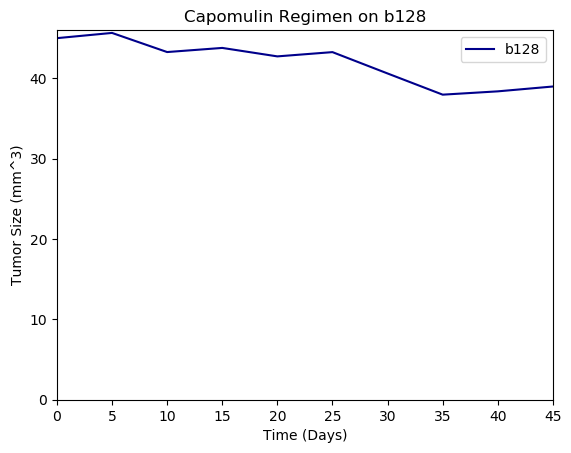

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#mouse_id = input("Enter Mouse ID")
mouse_id = 'b128'
capomulin_df = clean_data[clean_data['Drug Regimen']=="Capomulin"]
mouse_id_df = capomulin_df[capomulin_df['Mouse ID']==mouse_id]

mouse_id_df.set_index('Timepoint', inplace = True)
mouse_id_df["Tumor Volume (mm3)"].plot(color = 'DarkBlue',label=mouse_id)

plt.xlabel('Time (Days)')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f"Capomulin Regimen on {mouse_id}")
plt.ylim(0,46)
plt.legend()

plt.show()


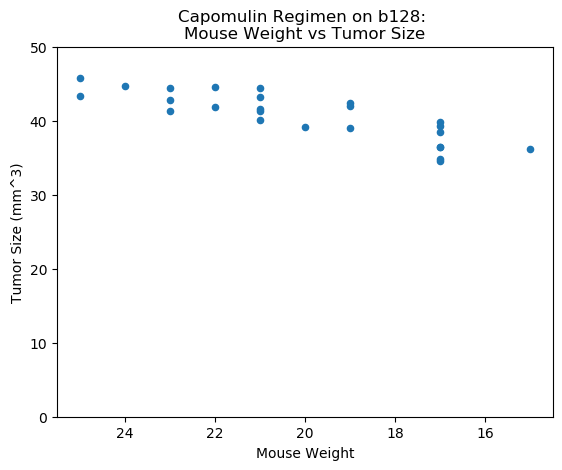

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = clean_data[clean_data['Drug Regimen']=="Capomulin"]
capomulin_groupby_weight = capomulin_df.groupby('Mouse ID').mean()
capomulin_groupby_weight =capomulin_groupby_weight.reset_index()
capomulin_df_reduced =capomulin_groupby_weight[['Weight (g)', 'Tumor Volume (mm3)']]

capomulin_df_reduced.plot.scatter('Weight (g)','Tumor Volume (mm3)').invert_xaxis()

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f"Capomulin Regimen on {mouse_id}: \nMouse Weight vs Tumor Size")
plt.ylim(0,50)


plt.show()

The r-squared is: 0.8419363424694718


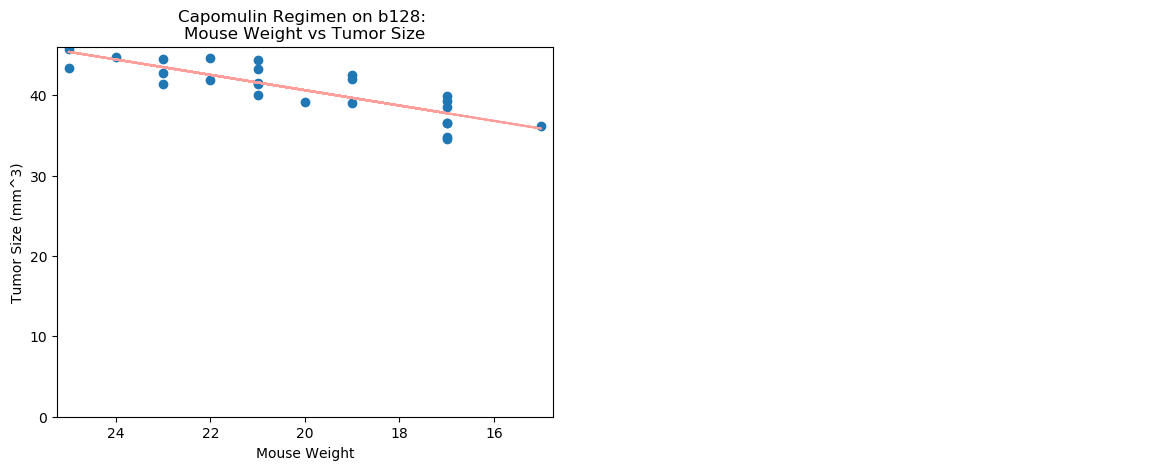

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
fig , ax = plt.subplots()
x_values =capomulin_groupby_weight['Weight (g)']
y_values =capomulin_groupby_weight['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

ax.set_xlim(25.25,14.75)
ax.set_ylim(0,50)

plt.annotate(line_eq,(6,10),fontsize = 15, color = "red")

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f"Capomulin Regimen on {mouse_id}: \nMouse Weight vs Tumor Size")
plt.ylim(0,46)

print(f"The r-squared is: {rvalue}")
plt.show()

### Extra studies

#### Deaths

{'whiskers': [<matplotlib.lines.Line2D at 0x1b85c4dd4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b85c4dde80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b85c4dd278>],
 'medians': [<matplotlib.lines.Line2D at 0x1b85c6750b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b85c675710>],
 'means': []}

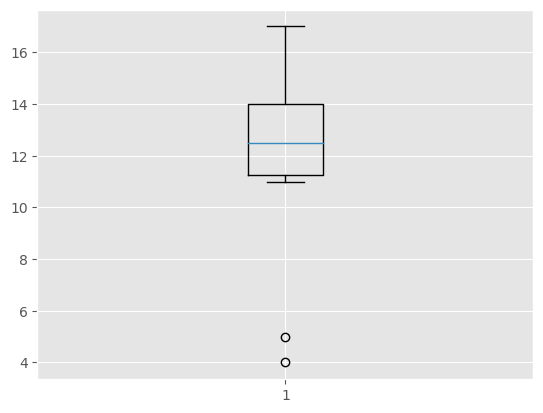

In [123]:
# Finding the number of deaths in each drug regimen
a =complete_df['Mouse ID'].value_counts()
a = pd.DataFrame(a)

#finding the Mice that didn't surive to the 10th test (i.e. <10)
a=a[a['Mouse ID']<10]

#Creating a DF of Mouse ID and Drug regimen
b = complete_df[['Mouse ID', 'Drug Regimen']].drop_duplicates()
b = b.reset_index()
a =a.reset_index()

#attaching drug regimen back to the Mouse IDs that failed to reach 10
c =a.merge(b,left_on='index', right_on = 'Mouse ID')
d =c.groupby('Drug Regimen').count()
d=d.sort_values('index_x')['index_x']
d
plt.boxplot(d)

#### Metastatic sites

In [145]:
# Finding the number of deaths in each drug regimen
m =complete_df[complete_df['Timepoint']==45][['Drug Regimen','Metastatic Sites']]
m =m.groupby('Drug Regimen').mean()
#a = pd.DataFrame(a)

#finding the Mice that didn't surive to the 10th test (i.e. <10)
#a=a[a['Mouse ID']<10]

#Creating a DF of Mouse ID and Drug regimen
#b = complete_df[['Mouse ID', 'Drug Regimen']].drop_duplicates()
#b = b.reset_index()
#a =a.reset_index()

#attaching drug regimen back to the Mouse IDs that failed to reach 10
#c =a.merge(b,left_on='index', right_on = 'Mouse ID')
#d =c.groupby('Drug Regimen').count()
#d=d.sort_values('index_x')['index_x']
#d
m.sort_values('Metastatic Sites')


,Metastatic Sites
Drug Regimen,
Ramicane,1.250000
Capomulin,1.476190
Stelasyn,1.727273
Infubinol,2.111111
Naftisol,2.538462
Propriva,2.571429
Ceftamin,2.692308
Zoniferol,3.071429
Placebo,3.272727


{'whiskers': [<matplotlib.lines.Line2D at 0x1b85d518b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1b85d518fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b85d518710>],
 'medians': [<matplotlib.lines.Line2D at 0x1b85d520908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b85d520c50>],
 'means': []}

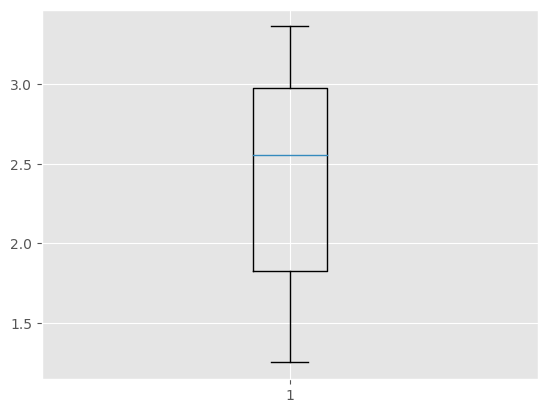

In [143]:
plt.boxplot(m['Metastatic Sites'])